# 5주차 : 재귀알고리즘

- <a href="#1.재귀와알고리즘성능">1. 재귀와 알고리즘 성능</a>
- <a href="#2.재귀응용">2. 재귀 응용</a>

------------------------------

## <a name="1.재귀와알고리즘성능">1. 재귀와 알고리즘 성능</a>

### 1-1. 알고리즘의 성능 분석

#### #time 모듈을 이용한 실행시간 측정

In [ ]:
def test(n):
    l = []
    for i in range(n):
        l.append(i)
        
import time
start = time.time()
test(1000)
end = time.time()
print(f"실행시간 = {end-start}")


In [3]:
import timeit

n = 1000

# 1.append() 메서드
def test1():
    l = []
    for i in range(n):
        l.append(i)

# 2.extend() 메서드
def test2():
    l = []
    for i in range(n):
        l.extend([i])
        
# 3.리스트 연결 연산자
def test3():
    l = []
    for i in range(n):
        l = l + [i]

# 4.리스트 조건제시법
def test4():
    l = [i for i in range(n)]

# 5.range 객체 활용
def test5():
    l = list(range(n))

print(f"append() 메서드:   {timeit.timeit('test1()', number=n, globals=globals())}")
print(f"extend() 메서드:   {timeit.timeit('test2()', number=n, globals=globals())}")
print(f"리스트 연결 연산자: {timeit.timeit('test3()', number=n, globals=globals())}")
print(f"리스트 조건제시법:  {timeit.timeit('test4()', number=n, globals=globals())}")
print(f"range 객체 활용:   {timeit.timeit('test5()', number=n, globals=globals())}")

append() 메서드:   0.04211360000772402
extend() 메서드:   0.08956369999214076
리스트 연결 연산자: 1.4777376000129152
리스트 조건제시법:  0.023749199986923486
range 객체 활용:   0.01016529998742044


#### #실행 시간 그래프로 시각화

In [ ]:
!pip install matplotlib

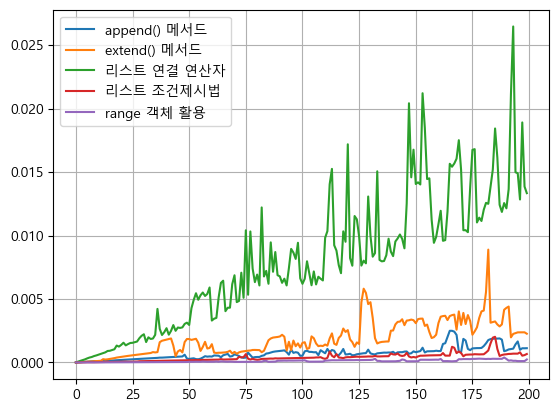

In [4]:
result, n = [], 200
funcs = {'test1()':'append() 메서드',
         'test2()':'extend() 메서드',
         'test3()':'리스트 연결 연산자',
         'test4()':'리스트 조건제시법',
         'test5()':'range 객체 활용'}


def drawgraph():
    import matplotlib.pyplot as plt
    plt.rcParams['font.family'] ='Malgun Gothic'   # Mac: 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] =False

    for idx, func in enumerate(funcs.keys()):
        plt.plot(result[idx], label=funcs[func])
    plt.legend()
    plt.grid()
    plt.show


def checktime(func, n):
    tmp = []
    for i in range(n):
        tmp.append(timeit.timeit(func, number=i, globals=globals()))
    return tmp
    
result = [checktime(func, n) for func in funcs]
drawgraph()

-----

### 1-2. 점화 식(Recurrence formula)
-  점화 관계 = 점화 식
-  점화 식(or 점화 관계)에서 수열을 정의하기 위해서는 초기값이 주어져야 한다.
-  이러한 초기값을 초기 조건(initial condition)이라고 부른다

### [Quiz] 피보나치의 토끼 번식 문제
        

In [ ]:
# 반복문 이용
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for i in range(2, n+1):
            a, b = b, a + b
        return b

fibonacci(13)

In [1]:
# 재귀 호출 이용
def fibonacci_recursive(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)
fibonacci_recursive(20)

6765

------------------------

### 1-3. 재귀 알고리즘(Recursive Algorithm)

#### 재귀 알고리즘
- **문제를 해결을 위해 동일한 형태의 작은 문제로 반복적으로 축소시켜 나가는 알고리즘**
- 재귀 호출(Recursion: 자신을 다시 호출)을 사용한다.
- **재귀 알고리즘 특징**
  * 1.기본 사례(Base Case): 가장 작은 문제에 대한 해답을 미리 정의해 놓음
  * 2.재귀 단계(Recursive Step): 현재 문제를 작은 인스턴스의 문제로 분할하고, 그 부분 문제에 대해 재귀적으로 호출함
- 시뮬레이션 : https://pythontutor.com/ 

In [ ]:
# ex) factorial
def factorial(n):
    if n == 1:                 # 1.Base Case
        return 1
    return n * factorial(n-1)  # 2.Recursive Step

result = factorial(5)


### [실습문제 ] 재귀 알고리즘 적용하기

1.countdown(n) : 5->4->3->2->1->'발사' 순서로 출력하기

In [ ]:
# Countdown : 5->4->3->2->1->'발사' 순서로 출력하기)
def countdown(n):
    if n==0 :
        print('발사!') 
    else:  
        print(n, end='->')
        countdown(n-1)        

countdown(5)

2. printStar(n) : 별 모양 출력하기

In [ ]:
'''
*
**
***
****
***** 
'''
def printStar(n):
    if n > 0:
        printStar(n-1)
        print('⭐'*n)
        
print( printStar(5) )

3. addNumber(n) : 1~10까지 합계 구하기

In [ ]:
def addNumber(n):
    if n==1:
        return 1
    return n + addNumber(n-1)

print( addNumber(10) )

4. sum_range(start, end) : 임의의 두 수 사이의 합계 구하기(1~100 정수)

In [ ]:
def sum_range(start, end):
    if start > end:
        return 0
    return start + sum_range(start+1, end)
    
import random
num1 = random.randint(1,101)
num2 = random.randint(1,101)
print(num1, num2)
if num1 > num2: 
    num1, num2 = num2, num1
    
print( sum_range(num2, num1) )

5.reverse(s) : 문자열 뒤집기  

In [ ]:
def reverse(s):
    if len(s) == 0:
        return s
    else: 
        return reverse(s[1:]) + s[0]
s = input('문자열 입력: ')
print( reverse(s) )

-----------------

## <a name="2.재귀응용">2. 재귀 응용</a>

### 2-1. 회문(Palindrome)여부 판단하기
- 회문(Palindrome): 앞에서부터 읽든, 뒤에서부터  읽든 동일한 단어나 문장을 의미 

In [ ]:
# 회문 테스트용 문자열
tStrings = ['level','radar','kayak','I prefer pi',
         '기러기','일요일','주유소의 소유','야 너 이번 주 주번이 너야']
tStrings = ['reaver', 'level','기러기','살금 살금']

### [실습문제] 문자열 회문 여부 판단하기

In [ ]:
# 1.리스트 함수/인덱싱 이용
def is_palindrome(tStrings):  # 회문 여부 판별    
    for tStr in tStrings:
        tStr = tStr.lower().replace(' ','')  # 소문자->공백제거
        if tStr == tStr[::-1]:               # 역순정렬/reverse함수 사용
            print(f"{tStr}\t--> True")
        else:
            print(f"{tStr}\t--> False")

is_palindrome(['reaver', 'level','기러기','살금 살금'])

### [실습문제] 문자열 회문여부 판단하기(재귀 알고리즘 사용)

In [ ]:
# 2.재귀 알고리즘 사용
def palindrome(tStr):         # 재귀방법으로 회문 여부 체크
    if len(tStr) <= 1:                      # Base case --> 문자열 길이가 1이하면 
        return True                         
    if tStr[0] != tStr[-1]:                 # 첫 글자&끝 글자가 동일한지 체크
        return False
    return palindrome(tStr[1:len(tStr)-1])  # 재귀 호출


def is_palindrome(tStrings):  # 회문 여부 판별
    for tStr in tStrings:                    # 문자열 하나씩 읽기
        tStr = tStr.lower().replace(' ','')  # 소문자->공백제거
        if palindrome(tStr):                 # 판별 함수 호출
            print(f"{tStr} --> True")
        else:
            print(f"{tStr} --> False")

is_palindrome(['reaver', 'level','기러기','살금 살금'])

-----------------------

### 2-2. 프랙탈 그리기

### [실습문제] 코흐 곡선(Koch Curve) 그리기
[주의!] turtle 모듈은 PC python IDLE 툴에서 안정적으로 작동한다. 

In [ ]:
import turtle

def koch_curve(t, order, size):
    """
    t: 터틀 객체
    order: 반복 횟수
    size: 선분 길이
    """
    if order == 0:
        t.forward(size)
    else:
        koch_curve(t, order-1, size/3)
        t.left(60)
        koch_curve(t, order-1, size/3)
        t.right(120)
        koch_curve(t, order-1, size/3)
        t.left(60)
        koch_curve(t, order-1, size/3)

def draw_koch_curve(order, size):
    t = turtle.Turtle()
    t.speed(0)      # 최대 속도로 그리기
    t.penup()
    t.goto(-200,0)  # 좌표 이동
    t.pendown()
    
    koch_curve(t, order, size)

# 코흐 커브 생성
draw_koch_curve(order=4, size=400)
turtle.exitonclick()
# turtle.mainloop()

### [실습문제] 시에르핀스키 삼각형

In [1]:
import turtle

def sierpinski_triangle(t, order, size, p1, p2, p3):
    """
    t: 터틀 객체
    order: 반복 횟수
    size: 삼각형 한 변의 길이
    p1, p2, p3: 삼각형의 세 꼭짓점 좌표
    """
    if order == 0:
        # 삼각형 그리기
        t.up()
        t.goto(p1)
        t.down()
        t.goto(p2)
        t.goto(p3)
        t.goto(p1)
    else:
        # 새로운 꼭짓점 계산
        p12 = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
        p23 = ((p2[0] + p3[0]) / 2, (p2[1] + p3[1]) / 2)
        p31 = ((p3[0] + p1[0]) / 2, (p3[1] + p1[1]) / 2)

        # 재귀 호출
        sierpinski_triangle(t, order-1, size/2, p1, p12, p31)
        sierpinski_triangle(t, order-1, size/2, p12, p2, p23)
        sierpinski_triangle(t, order-1, size/2, p31, p23, p3)

def draw_sierpinski_triangle(order, size):
    t = turtle.Turtle()
    t.speed(0)  # 최대 속도로 그리기
    
    p1 = (-size/2, -size/(2 * (3**0.5)))
    p2 = (size/2, -size/(2 * (3**0.5)))
    p3 = (0, size/(3**0.5))
    
    sierpinski_triangle(t, order, size, p1, p2, p3)

# 시에르핀스키 삼각형 생성
draw_sierpinski_triangle(order=4, size=500)  # 재귀 깊이, 삼각형한 변의 길이
turtle.mainloop()

In [ ]:
import turtle

def draw_sierpinski(length, depth):
    if depth == 0:
        # 깊이가 0일 때, 삼각형 그리기
        for _ in range(3):
            turtle.forward(length)
            turtle.left(120)
    else:
        # 삼각형을 삼등분하여 시에르핀스키 삼각형 그리기
        draw_sierpinski(length / 2, depth - 1)
        turtle.forward(length / 2)
        draw_sierpinski(length / 2, depth - 1)
        turtle.backward(length / 2)
        turtle.left(60)
        turtle.forward(length / 2)
        turtle.right(60)
        draw_sierpinski(length / 2, depth - 1)
        turtle.left(60)
        turtle.backward(length / 2)
        turtle.right(60)

def main():
    turtle.speed(0)  # 속도 설정 (0: 가장 빠름, 1: 느림)
    turtle.penup()
    turtle.goto(-200, -100)
    turtle.pendown()
    draw_sierpinski(400, 4)  # 삼각형의 한 변의 길이와 재귀 깊이 설정
    turtle.hideturtle()
    turtle.done()

main()

--------------------------------------------------------